# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part B): Mini-Challenge [25%]

<div align="right"><font color="blue" size="5">Your Score was 96.0 out of a total of 100.0, or 96.0%</font></div>

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 3 - Part A is an introduction to Object Recognition. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. This part of the Assignment is the same for all students i.e. irrespective of whether you are taking the Level 10 version (INFR10069) or the Level-11 version of the course (INFR11182 and INFR11152).

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. In the textual answer, you are given a word-count limit of 600 words: exceeding this will lead to penalisation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (typically referring only to the independent variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook (Part B), *and*
 1. The Jupyter Notebook for Part A
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **sticking to the submission structure** (see below). This is especially true for the submission of your predictions and your textual answer.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (Object Recognition) is worth 75% of the total Mark for Assignment 3, while Part B (this notebook) is worth 25%. Keep this in mind when allocating time for this assignment.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [2]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from utils import plotter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,log_loss
from sklearn.preprocessing import StandardScaler, RobustScaler,QuantileTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

C:\Users\User\Miniconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
C:\Users\User\Miniconda3\envs\py3iaml\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Mini challenge

In this second part of the assignment we will have a mini object-recognition challenge. Using the same type of data as in Part A, you are asked to find the best classifier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provision that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation.

### DataSet Description

The datasets we use here are similar in composition but not the same as the ones used in Part A: *it will be useful to revise the description in that notebook*. Specifically, you have access to three new datasets: a training set (`Images_C_Train.csv`), a validation set (`Images_C_Validate.csv`), and a test set (`Images_C_Test.csv`). You must use the former two for training and evaluating your models (as you see fit). As before, the full data-set has 520 attributes (dimensions). Of these you only have access to the 500 features (`dim1` through `dim500`) to test your model on: i.e. the test set does not have any of the class labels.

### Model Evaluation

Your results will be evaluated in terms of the logarithmic loss metric, specifically the [logloss](http://scikit-learn.org/0.19/modules/model_evaluation.html#log-loss) function from SKLearn. You should familiarise yourself with this. To estimate this metric you will need to provide probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` class-labels, the method will return an `N` x `K` matrix (with rows summing to 1).

### Submission and Scoring

This part of Assignment 3 carries 25% of the total marks. Within this, you will be scored on two criteria:
 1. 80% of the mark will depend on the thoroughness of the exploration of various approaches. This will be assessed through your code, as well as a brief description (<600 words) justifying the approaches you considered, your exploration pattern and your suggested final approach (and why you chose it).
 1. 20% of the mark will depend on the quality of your predictions: this will be evaluated based on the logarithmic loss metric.
Note here that just getting exceptional performance is not enough: in fact, you should focus more on analysing your results that just getting the best score!

You have to submit the following:
 1. **All Code-Cells** which show your **working** with necessary output/plots already generated.
 1. In **TEXT** cell `#ANSWER_TEXT#` you are to write your explanation (<600 words) as described above. Keep this brief and to the point. **Make sure** to keep the token `#ANSWER_TEXT#` as the first line of the cell!
 1. In **CODE** cell `#ANSWER_PROB#` you are to submit your predictions. To do this:
    1. Once you have chosen your favourite model (and pre-processing steps) apply it to the test-set and estimate the posterior proabilities for the data points in the test set.
    1. Store these probabilities in a 2D numpy array named `pred_probabilities`, with predictions along the rows i.e. each row should be a complete probability distribution over whether the image contains a person or not. Note that due to the encoding of the `is_person` class, the negative case (i.e. there is no person) comes first.
    1. Execute the `#ANSWER_PROB#` code cell, making sure to not change anything. This cell will do some checks to ensure that you are submitting the right shape of array.

You may create as many code cells as you need (within reason) for training your models, evaluating the data etc: however, the text cell `#ANSWER_TEXT#` and code-cell `#ANSWER_PROB#` showing your answers must be the last two cells in the notebook.

In [4]:
# This is where your working code should start. Fell free to add as many code-cells as necessary.
#  Make sure however that all working code cells come BEFORE the #ANSWER_TEXT# and #ANSWER_PROB#
#  cells below.

# Your Code goes here:
# Loading the datasets in the appropriate dataframes
c_train_loc = os.path.join(os.getcwd(), 'datasets', 'Images_C_Train.csv')
img_c_train=pd.read_csv(c_train_loc)
label_c_train=img_c_train['is_person'] #selecting only the is_person class label from our dataset.
features_c_train=img_c_train.loc[:,'dim1':'dim500'] #selecting only the visual features from our dataset.
img_c_train=pd.concat([features_c_train,label_c_train],axis=1)#merging the visual features with the is_person class label.
X_train=features_c_train;
y_train=label_c_train;

#Similarly for the validation set
c_val_loc = os.path.join(os.getcwd(), 'datasets', 'Images_C_Validate.csv')
img_c_val=pd.read_csv(c_val_loc)
label_c_val=img_c_val['is_person'] 
features_c_val=img_c_val.loc[:,'dim1':'dim500'] 
img_c_val=pd.concat([features_c_val,label_c_val],axis=1)
X_val=features_c_val;
y_val=label_c_val;

#Similarly for the test set (without the labels because they are not provided for the test set,we are measuring log loss).
c_test_loc = os.path.join(os.getcwd(), 'datasets', 'Images_C_Test.csv')
img_c_test=pd.read_csv(c_test_loc) 
features_c_test=img_c_test.loc[:,'dim1':'dim500'] 
X_test=features_c_test

#inspecting datasets for dissimilarities and any abnormalities
print('Training set:')
display(X_train.describe())
print('Validation set:')
display(X_val.describe())
print('Testing set:')
X_test.describe()

Training set:


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.043353,0.050830,0.047988,0.037411,0.043365,0.049670,0.051071,0.043601,0.052698,0.054139,...,0.050306,0.052482,0.044370,0.046100,0.043218,0.049724,0.050818,0.038214,0.050150,0.051801
std,0.513260,0.582839,0.482166,0.464611,0.491187,0.558422,0.577599,0.472706,0.571629,0.588484,...,0.561111,0.616955,0.466802,0.528117,0.508790,0.561206,0.562799,0.437885,0.581028,0.569857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000868,0.000000,0.001359,0.000781,0.001116,0.001019,0.000340,0.000651,0.000756,0.001116,...,0.001019,0.000000,0.000679,0.000679,0.001764,0.001019,0.000744,0.001116,0.001019,0.001019
50%,0.001616,0.000340,0.003516,0.001698,0.002038,0.001860,0.000756,0.001645,0.001698,0.002155,...,0.001860,0.000000,0.002717,0.001359,0.003125,0.001953,0.002038,0.002038,0.002038,0.002268
75%,0.002404,0.001008,0.006454,0.002717,0.003125,0.003057,0.001488,0.003397,0.002734,0.003736,...,0.003005,0.000679,0.006641,0.002232,0.004883,0.003057,0.004076,0.003057,0.003397,0.004076
max,9.984000,9.122238,7.676800,9.695738,8.762671,9.489078,9.751526,8.691076,9.013933,9.602705,...,9.922150,9.673318,7.375434,9.672255,9.348755,9.299061,9.951019,9.036268,9.963328,9.505755


Validation set:


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,...,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.001744,0.000702,0.004720,0.001978,0.002321,0.002110,0.001037,0.002529,0.002006,0.002641,...,0.002142,0.000598,0.004817,0.001585,0.003611,0.002196,0.002772,0.002239,0.002407,0.003097
std,0.001209,0.001364,0.003876,0.001417,0.001558,0.001559,0.000885,0.002736,0.001919,0.002293,...,0.001600,0.001241,0.005831,0.001243,0.002471,0.001575,0.003182,0.001346,0.001868,0.002590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000744,0.000000,0.001698,0.001019,0.001172,0.001019,0.000340,0.000679,0.000781,0.001019,...,0.001019,0.000000,0.000679,0.000679,0.001860,0.001019,0.000679,0.001250,0.001019,0.001359
50%,0.001563,0.000340,0.003736,0.001698,0.002038,0.001803,0.000781,0.001698,0.001563,0.002038,...,0.001838,0.000000,0.002734,0.001359,0.003125,0.001860,0.001838,0.002038,0.002038,0.002604
75%,0.002378,0.000758,0.007102,0.002734,0.003057,0.002976,0.001488,0.003397,0.002717,0.003397,...,0.002976,0.000679,0.006793,0.002232,0.004836,0.003057,0.003736,0.003057,0.003348,0.004092
max,0.007133,0.022135,0.023438,0.008929,0.010417,0.010789,0.005757,0.022396,0.025000,0.013927,...,0.009821,0.012747,0.042026,0.009821,0.015625,0.013346,0.029225,0.007068,0.011889,0.026786


Testing set:


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,...,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,0.001754,0.000717,0.004379,0.001839,0.002207,0.002105,0.001058,0.002535,0.002053,0.002746,...,0.002033,0.000577,0.004880,0.001537,0.003591,0.002080,0.002897,0.002216,0.002438,0.003017
std,0.001226,0.001522,0.003648,0.001320,0.001539,0.001612,0.000863,0.002867,0.001990,0.002470,...,0.001597,0.001146,0.006427,0.001200,0.002626,0.001519,0.003240,0.001449,0.001897,0.002795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000977,0.000000,0.001488,0.000744,0.001019,0.001019,0.000340,0.000679,0.000744,0.001065,...,0.000791,0.000000,0.000679,0.000679,0.001698,0.001019,0.000744,0.001065,0.001019,0.001019
50%,0.001590,0.000340,0.003397,0.001698,0.001860,0.001776,0.000822,0.001596,0.001667,0.002115,...,0.001698,0.000000,0.002717,0.001359,0.003057,0.001813,0.002038,0.002038,0.002038,0.002361
75%,0.002378,0.000781,0.006454,0.002717,0.003057,0.002717,0.001698,0.003397,0.002717,0.003720,...,0.002717,0.000679,0.006793,0.002232,0.004755,0.002734,0.003831,0.003057,0.003463,0.004076
max,0.009046,0.027699,0.021399,0.007473,0.009766,0.011889,0.004755,0.021399,0.021140,0.022500,...,0.015253,0.010691,0.062500,0.007576,0.026834,0.009851,0.029212,0.007812,0.012228,0.028193


### Removing outliers
As we notice most of the features of the training set certainly contain **outliers**.
This can be noticed due to the **max** values of the features being *very apart from the mean (**more than 3 stds**)*.
For example `dim1` has *mean*=0.043353, *std*=0.513260 and a *max* value=9.984, which is very abnormal and it is considered an outlier.
This holds for almost *every* feature(`dim`) in the training dataset, which would result in training our classifiers with the wrong patterns to be able to predict the class of unseen data at a later stage.
We therefore remove the outliers from the training dataset using a boolean indexing expression.

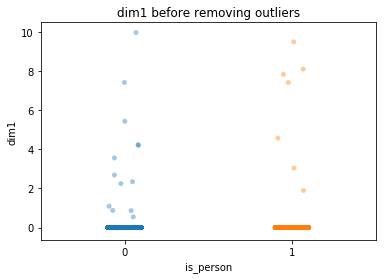

In [5]:
#creating an example for dim1 to show that there are indeed outliers to the distribution of the data-points with the class.
X_train_dirty=pd.DataFrame()
X_train_dirty['dim1']=X_train['dim1']
X_train_dirty['is_person']=y_train #an example to visualise an outlier-containing feature.

#visualising the datapoints for that feature.
ax1=sns.stripplot(x='is_person',y='dim1', data=X_train_dirty, jitter=True, alpha=.4)
ax1.set_title('dim1 before removing outliers')

#Cleaning the training dataset from outliers using boolean indexing (code used from Assignment1-Analysis)
X_train_clean=X_train.copy()
X_train_clean=X_train[(np.abs(X_train-X_train.mean()) <= 3*X_train.std()).all(axis=1)] #this is an 
#expression containing boolean indexing with the values that are within the 3 stds range of the mean (non-outliers)
#and then selecting only those documents for which the attributes (columns, axis=1) contain NO OUTLIERS (.all()) i.e. deleting
#the documents which contain at least one outlier
y_train_clean=y_train[(np.abs(X_train-X_train.mean()) <= 3*X_train.std()).all(axis=1)]

Text(0.5,1,'dim1 after removing outliers')

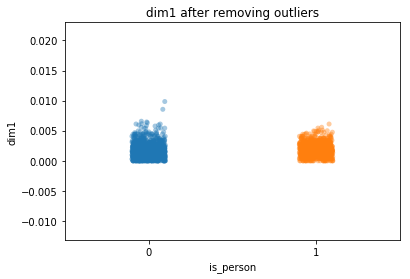

In [6]:
#verifying that outliers were removed for the dim1 example
X_no_outlier=pd.DataFrame()
X_no_outlier['dim1']=X_train_clean['dim1']
X_no_outlier['is_person']=y_train #an example to visualise an outlier-containing feature.
ax2=sns.stripplot(x='is_person',y='dim1', data=X_no_outlier, jitter=True, alpha=.4)
ax2.set_title('dim1 after removing outliers')

### Scaling the datasets with RobustScaler since we identified & removed outliers in the training dataset, and to ensure data will be scaled with a robust method (view [References](#references) for reasons in RobustScaler source)

In [7]:
tr=RobustScaler()
tr.fit(X_train_clean)
X_train_scaled=tr.transform(X_train_clean)
X_val_scaled=tr.transform(X_val)
X_test_scaled=tr.transform(X_test)

#converting back to dataframes after transform
X_train_scaled=pd.DataFrame(data=X_train_scaled,index=X_train_clean.index,columns=X_train.columns)#including indices of non-outliers
X_val_scaled=pd.DataFrame(data=X_val_scaled,index=X_val.index,columns=X_val.columns)
X_test_scaled=pd.DataFrame(data=X_test_scaled,index=X_test.index,columns=X_test.columns)

### Comparing classifiers' performances

In [300]:
#labels for plotting the comparison between clfs
clfs_names = ['Naive Bayes','Decision Tree', 'Random Forest','KNN',
              'Logistic Regressor','Linear SVC', 'RBF SVC', 'Polynomial SVC','Multi-Layer Perceptron']
#The initial classifiers (all default settings) used for comparison to rule out the worst-performance clfs.
clfs = [
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'),
    SVC(kernel='linear',probability=True),
    SVC(kernel='rbf',probability=True),
    SVC(kernel='poly',probability=True),
    MLPClassifier()
    ]

In [299]:
# initialise arrays to store the scores and log losses of all classifiers for training and validation sets.
scores_train = np.ndarray(len(clfs))
scores_val = np.ndarray(len(clfs))
log_losses_val=np.ndarray(len(clfs))
# iterate over all classifiers along with their names and populate the arrays with the scores and log losses
i = 0
for clf_name, clf in zip(clfs_names, clfs):
    clf.fit(X_train_scaled, y_train_clean)
    probs_val=clf.predict_proba(X_val_scaled)
    scores_train[i] = clf.score(X_train_scaled, y_train_clean)
    scores_val[i] = clf.score(X_val_scaled, y_val)
    log_losses_val[i]=log_loss(y_true=y_val,y_pred=probs_val)
    i = i+1

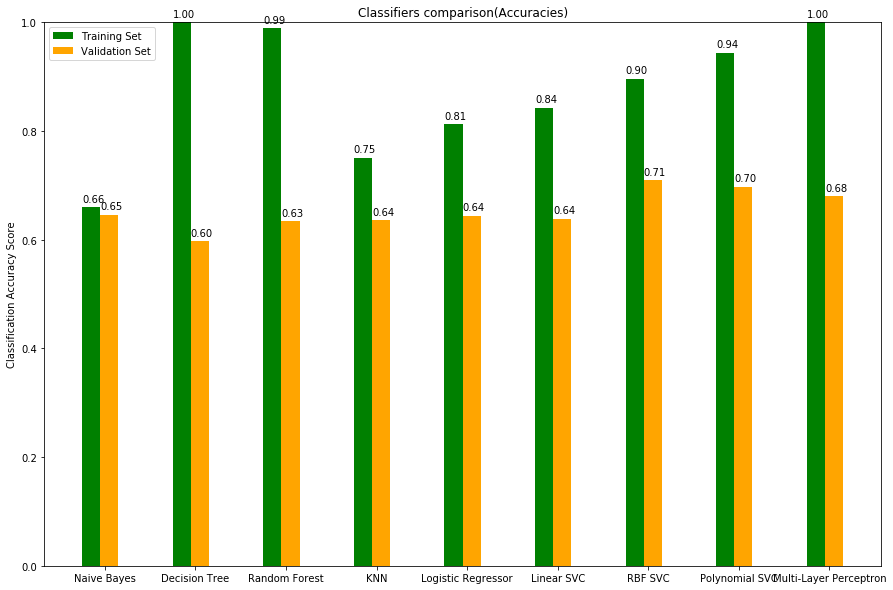

In [302]:
# Plot Comparison of the explored classifiers' accuracy scores 
fig = plt.figure(figsize=(15,10))

x = np.linspace(1, len(clfs), len(clfs), endpoint=True)
ax = plt.subplot(1,1,1)
ax.bar(x-.15, scores_train, color='green', align='center',width=0.2, label='Training Set')
ax.bar(x+.05,scores_val, color='orange',align='center',width=0.2,label='Validation Set')
ax.set_ylim(0,1.0)
ax.legend()

# Display the scores for Each Bar
for i, score in enumerate(scores_train):
    ax.text(i+.75, score+.01, '%.2f' % score)
for i, score in enumerate(scores_val):
    ax.text(i+.95, score+.01, '%.2f' % score)
    
    
# Label and Show Plot
plt.xticks(x, clfs_names)
plt.ylabel('Classification Accuracy Score')
plt.title('Classifiers comparison(Accuracies)')
plt.show()


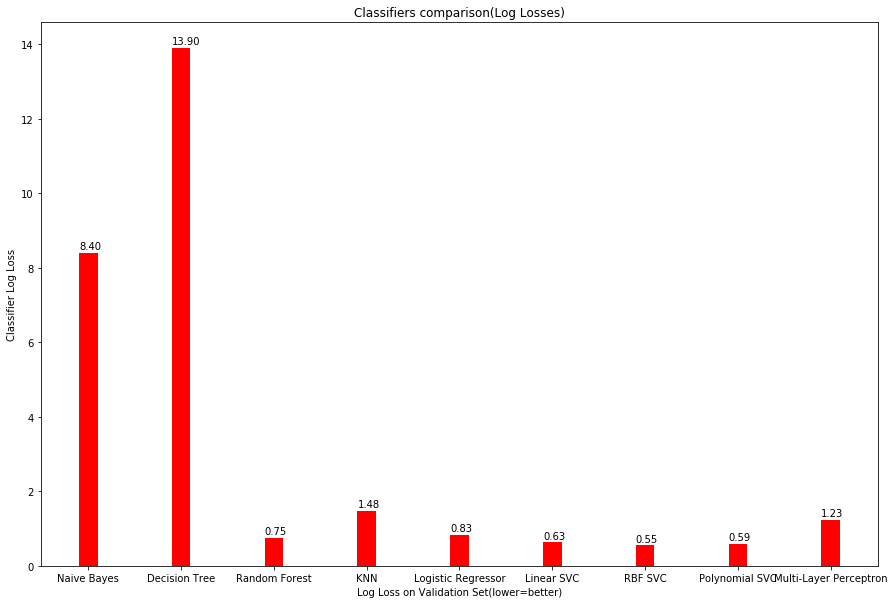

In [303]:
# Plot to compare log losses
fig=plt.figure(figsize=(15,10))
x = np.linspace(1, len(clfs), len(clfs), endpoint=True)
ax = plt.subplot(1,1,1)
ax.bar(x,log_losses_val, color='red',align='center',width=0.2)
for i, score in enumerate(log_losses_val):
    ax.text(i+.9, score+.1, '%.2f' % score)
# Label and Show Plot
plt.xticks(x, clfs_names)
plt.ylabel('Classifier Log Loss')
plt.xlabel('Log Loss on Validation Set(lower=better)')
plt.title('Classifiers comparison(Log Losses)')
plt.show()

### Selected Classifiers for Evaluation & Optimisation (based on lower Log Loss-red bars): 
#### 1.  SVC (will select which below)
#### 2. Random Forest
#### 3. Logistic Regressor


### Selecting which SVC kernel(s) to use (by inspecting barplots above for log loss & decision boundaries plots)

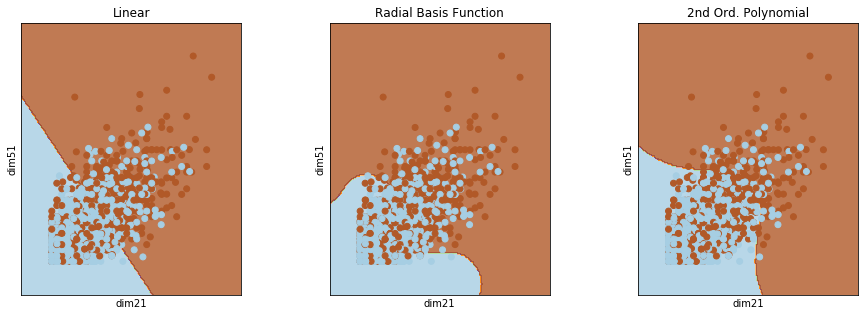

In [338]:
#taking a sample of 2 dimensions
dim21=pd.Series((X_train_scaled['dim1']))
dim51=pd.Series((X_train_scaled['dim21']))
X=pd.concat([dim1,dim29],axis=1)
X=X.values

svc_linear = SVC(kernel="linear")
svc_linear.fit(X=X, y=y_train_clean)
svc_rbf = SVC(kernel="rbf",gamma='auto')
svc_rbf.fit(X=X, y=y_train_clean)
svc_polynomial = SVC(kernel="poly")
svc_polynomial.fit(X=X, y=y_train_clean)
clfs=[svc_linear,svc_rbf,svc_polynomial]
plotter.plot_SVM_DecisionBoundary(X=X,y=y_train_clean,clfs=clfs,labels=['dim21','dim51'],title=['Linear','Radial Basis Function','2nd Ord. Polynomial'])

##### We can clearly see that the data is not linearly separable, and we are only considering two features. We definitely rule out the Linear SVC and hence we will try to optimise the Polynomial (degree and C) and  RBF (gamma and C) SVCs.

### 1.a Polynomial Kernel SVC - Optimizing degree and C (We want both high accuracy and low log loss)

In [309]:
#define a 5-fold kfold object for use in cross-validation
kfold=sklearn.model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
Crange_Poly=np.logspace(start=-2,stop=3,num=6) #used 6 steps to cover range from 0.01 to 1000 ,the step-size is evenly-spaced
#as chosen from the logspace function.

degrange=np.arange(1,6) #the arange with arguments (1,6) will take the range 1..5 inclusive. 

accuracies_Poly = np.ndarray((5,6,5)) #initialize a 3d array(fold iteration,C value and degree value dimensions) for accuracies.
log_losses_Poly = np.ndarray((5,6,5)) #initialize a 3d array(fold iteration,C value and degree value dimensions) for log losses.
#initialise fold iterator
fold_i=0
for train_indices, test_indices in kfold.split(X_train_scaled): # split the training set into cross-validation subsets train and test
    print('Accuracies & Log Losses for fold ',fold_i+1,':  ')
    C_i=0
    for C_temp in Crange_Poly:
        print('Accuracies & Log Losses for C value= ',C_temp,' for the 5 polynomial degrees:  ')
        deg_i=0
        for deg_temp in degrange: 
            SVC_temp = SVC(kernel='poly',degree=deg_temp,C=C_temp,probability=True)
            SVC_temp.fit(X_train_scaled.iloc[train_indices], y_train_clean.iloc[train_indices])
            accuracy_score = SVC_temp.score(X_train_scaled.iloc[test_indices], y_train_clean.iloc[test_indices])
            probs_Poly= SVC_temp.predict_proba(X_val_scaled)
            accuracies_Poly[fold_i, C_i,deg_i] = accuracy_score
            log_losses_Poly[fold_i, C_i,deg_i] = log_loss(y_true=y_val,y_pred=probs_Poly)
            deg_i=deg_i+1
        print(accuracies_Poly[fold_i,C_i])
        print(log_losses_Poly[fold_i,C_i])
        C_i=C_i+1
    fold_i=fold_i+1
    print()          

print('Mean (accross folds) cross-validated accuracies for C-degree combinations ')
means_Poly=(np.mean(accuracies_Poly,axis=0))
means_log_Poly=(np.mean(log_losses_Poly,axis=0))
C_i=0
for C_temp in Crange_Poly:
    print('Fold-averaged cross-validation accuracies for C= ',C_temp,' for each of the 5 degrees: ')
    print(means_Poly[C_i])
    print('Fold-averaged cross-validation log losses for C= ',C_temp,' for each of the 5 degrees: ')
    print(means_log_Poly[C_i])
    C_i=C_i+1

Accuracies & Log Losses for fold  1 :  
Accuracies & Log Losses for C value=  0.01  for the 5 polynomial degrees:  
[0.55131265 0.55131265 0.54892601 0.55131265 0.55131265]
[0.62556589 0.62084881 0.68747947 0.70742417 0.69350452]
Accuracies & Log Losses for C value=  0.1  for the 5 polynomial degrees:  
[0.66109785 0.62291169 0.56563246 0.55131265 0.54892601]
[0.59893231 0.60352513 0.64279442 0.68646503 0.69050045]
Accuracies & Log Losses for C value=  1.0  for the 5 polynomial degrees:  
[0.65632458 0.68973747 0.6372315  0.59427208 0.57995227]
[0.59317372 0.58498688 0.60421016 0.647115   0.67349069]
Accuracies & Log Losses for C value=  10.0  for the 5 polynomial degrees:  
[0.64916468 0.67541766 0.66587112 0.63961814 0.57756563]
[0.61770509 0.61045454 0.6078896  0.6370209  0.72251849]
Accuracies & Log Losses for C value=  100.0  for the 5 polynomial degrees:  
[0.62768496 0.67303103 0.66348449 0.64916468 0.60143198]
[0.6367237  0.60838049 0.60868995 0.64169423 0.69292192]
Accuracies 

Optimal C-degree combination(yielded max mean cross_val accuracy):  
    C= 1.0
    degree= 2
Optimal combination mean accuracy:  0.705


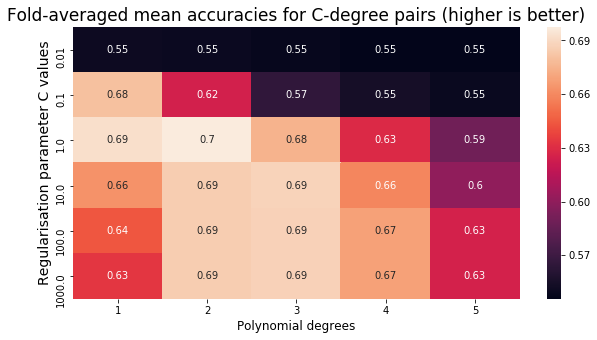

In [313]:
figure,axis= plt.subplots(1,1, figsize=(10,5))
axis.set_title('Fold-averaged mean accuracies for C-degree pairs (higher is better)',fontsize=17)
sns.heatmap(data=means_Poly,xticklabels=degrange,yticklabels=Crange_Poly,annot=True,robust=True,ax=axis)
axis.set_xlabel('Polynomial degrees',fontsize=12)
axis.set_ylabel('Regularisation parameter C values',fontsize=14)
C_optimal_Poly=Crange_Poly[np.where(means_Poly==means_Poly.max())[0]][0]
degree_optimal=degrange[np.where(means_Poly==means_Poly.max())[1]][0]
print("Optimal C-degree combination(yielded max mean cross_val accuracy):  ")
print("    C=",C_optimal_Poly)
print("    degree=",degree_optimal)
print("Optimal combination mean accuracy: ",round(means_Poly.max(),3))

Optimal C-degree combination(yielded MINIMUM mean cross_val log losses):  
    C= 1.0
    degree= 2
Optimal combination mean log loss:  0.576


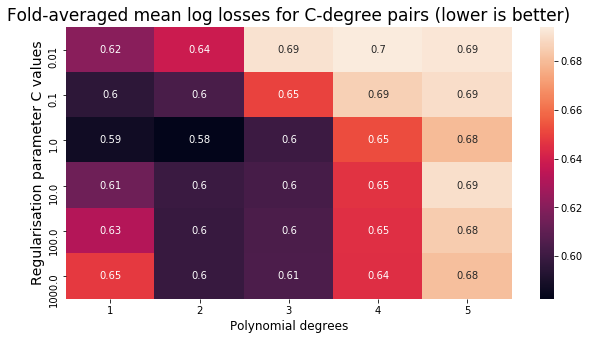

In [317]:
figure,axis= plt.subplots(1,1, figsize=(10,5))
axis.set_title('Fold-averaged mean log losses for C-degree pairs (lower is better)',fontsize=17)
sns.heatmap(data=means_log_Poly,xticklabels=degrange,yticklabels=Crange_Poly,annot=True,robust=True,ax=axis)
axis.set_xlabel('Polynomial degrees',fontsize=12)
axis.set_ylabel('Regularisation parameter C values',fontsize=14)
C_optimal_log_Poly=Crange_Poly[np.where(means_log_Poly==means_log_Poly.min())[0]][0]
degree_optimal_log=degrange[np.where(means_log_Poly==means_log_Poly.min())[1]][0]

print("Optimal C-degree combination(yielded MINIMUM mean cross_val log losses):  ")
print("    C=",C_optimal_log_Poly)
print("    degree=",degree_optimal_log)
print("Optimal combination mean log loss: ",round(means_log_Poly.min(),3))

### Optimised values `C` and `degree` match for optimised *log loss* and *accuracy* but unfortunately are the same original (default) values used (C=1.0 and degree=2 by default).  

In [342]:
#Checking performance with optimised parameters:
svc_polynomial_optimised=SVC(probability=True,kernel='poly',degree=degree_optimal_log,C=C_optimal_log_Poly)
svc_polynomial_optimised.fit(X_train_scaled,y_train_clean)
probs_poly_optimised=svc_polynomial_optimised.predict_proba(X_val_scaled)
accuracy_poly_optimised=svc_polynomial_optimised.score(X_val_scaled,y_val)
log_loss_poly_optimised=log_loss(y_pred=probs_poly_optimised,y_true=y_val)
print('Accuracy of optimised Polynomial SVC with C=1.0 and degree=2: ',round(accuracy_poly_optimised,2) )
print('Log loss of optimised Polynomial SVC with C=1.0 and degree=2: ',round(log_loss_poly_optimised,3))

Accuracy of optimised Polynomial SVC with C=1.0 and degree=2:  0.7
Log loss of optimised Polynomial SVC with C=1.0 and degree=2:  0.571


### As we observe, the optimisation of the Polynomial SVC did not make a significant improvement on the log loss (only 2% drop/improvement) and the accuracy remained the same(~70%)

### 1.b Radial Basis Function SVC

In [341]:
#define a 5-fold kfold object for use in cross-validation
kfold=sklearn.model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
Crange_rbf=np.logspace(start=-2,stop=3,num=6) #used 6 steps to cover range from 0.01 to 1000 ,the step-size is evenly-spaced
#as chosen from the logspace function.

gammarange=np.logspace(start=-6, stop=-2, num=5) #the range of gamma in the log space from 0.000001 to 0.01 *evenly* spaced 

accuracies_rbf = np.ndarray((5,6,5)) #initialize a 3d array(fold iteration,C value and gamma value dimensions) for accuracies.
log_losses_rbf = np.ndarray((5,6,5)) #initialize a 3d array(fold iteration,C value and gamma value dimensions) for log losses.
#initialise fold iterator
fold_i=0
for train_indices, test_indices in kfold.split(X_train_scaled): # split the training set into cross-validation subsets train and test
    print('Accuracies & Log Losses for fold ',fold_i+1,':  ')
    C_i=0
    for C_temp in Crange_rbf:
        print('Accuracies & Log Losses for C value= ',C_temp,' for the 5 rbf gamma values:  ')
        gamma_i=0
        for gamma_temp in gammarange: 
            SVC_temp = SVC(kernel='rbf',gamma=gamma_temp,C=C_temp,probability=True)
            SVC_temp.fit(X_train_scaled.iloc[train_indices], y_train_clean.iloc[train_indices])
            accuracy_score = SVC_temp.score(X_train_scaled.iloc[test_indices], y_train_clean.iloc[test_indices])
            probs_rbf= SVC_temp.predict_proba(X_val_scaled)
            accuracies_rbf[fold_i, C_i,gamma_i] = accuracy_score
            log_losses_rbf[fold_i, C_i,gamma_i] = log_loss(y_true=y_val,y_pred=probs_rbf)
            gamma_i=gamma_i+1
        print(accuracies_rbf[fold_i,C_i])
        print(log_losses_rbf[fold_i,C_i])
        C_i=C_i+1
    fold_i=fold_i+1
    print()          
print()
print('Mean (accross folds) cross-validated accuracies for C-gamma combinations ')
means_rbf=(np.mean(accuracies_rbf,axis=0))
means_log_rbf=(np.mean(log_losses_rbf,axis=0))
C_i=0
for C_temp in Crange_rbf:
    print('Fold-averaged cross-validation accuracies for C= ',C_temp,' for each of the 5 gammas: ')
    print(means_rbf[C_i])
    print('Fold-averaged cross-validation log losses for C= ',C_temp,' for each of the 5 gammas: ')
    print(means_log_rbf[C_i])
    C_i=C_i+1

Accuracies & Log Losses for fold  1 :  
Accuracies & Log Losses for C value=  0.01  for the 5 rbf gamma values:  
[0.55131265 0.55131265 0.55131265 0.55131265 0.55131265]
[1.01078382 0.63430369 0.630012   0.61961434 0.61548583]
Accuracies & Log Losses for C value=  0.1  for the 5 rbf gamma values:  
[0.55131265 0.55131265 0.55131265 0.64200477 0.55131265]
[0.64764366 0.62659962 0.62548866 0.59555262 0.61588787]
Accuracies & Log Losses for C value=  1.0  for the 5 rbf gamma values:  
[0.55131265 0.55131265 0.65155131 0.6849642  0.64916468]
[0.63243117 0.62020723 0.59619096 0.56591718 0.59850081]
Accuracies & Log Losses for C value=  10.0  for the 5 rbf gamma values:  
[0.55131265 0.65632458 0.68257757 0.64439141 0.65393795]
[0.62986536 0.59771861 0.58326402 0.58944631 0.59031424]
Accuracies & Log Losses for C value=  100.0  for the 5 rbf gamma values:  
[0.66109785 0.66825776 0.64677804 0.6372315  0.65393795]
[0.59876786 0.59048836 0.60915849 0.59406076 0.59026781]
Accuracies & Log Loss

Optimal C-gamma combination(yielded max mean cross_val accuracy):  
    C= 1.0
    gamma= 0.001
Optimal combination mean accuracy:  0.704


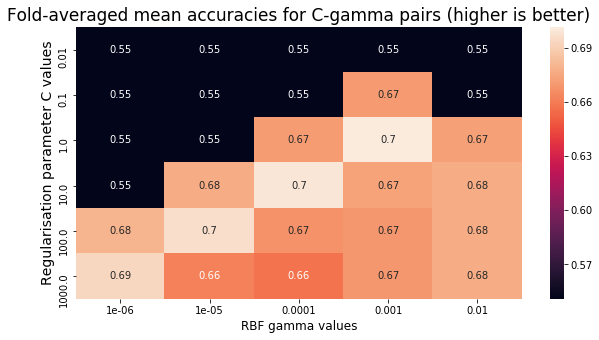

In [343]:
figure,axis= plt.subplots(1,1, figsize=(10,5))
axis.set_title('Fold-averaged mean accuracies for C-gamma pairs (higher is better)',fontsize=17)
sns.heatmap(data=means_rbf,xticklabels=gammarange,yticklabels=Crange_rbf,annot=True,robust=True,ax=axis)
axis.set_xlabel('RBF gamma values',fontsize=12)
axis.set_ylabel('Regularisation parameter C values',fontsize=14)
C_optimal_rbf=Crange_rbf[np.where(means_rbf==means_rbf.max())[0]][0]
gamma_optimal=gammarange[np.where(means_rbf==means_rbf.max())[1]][0]
print("Optimal C-gamma combination(yielded max mean cross_val accuracy):  ")
print("    C=",C_optimal_rbf)
print("    gamma=",gamma_optimal)
print("Optimal combination mean accuracy: ",round(means_rbf.max(),3))

Optimal C-gamma combination(yielded MINIMUM mean cross_val log losses):  
    C= 1.0
    gamma= 0.001
Optimal combination mean log loss:  0.563


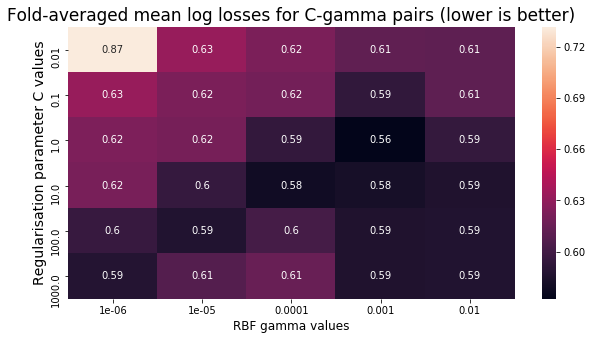

In [344]:
figure,axis= plt.subplots(1,1, figsize=(10,5))
axis.set_title('Fold-averaged mean log losses for C-gamma pairs (lower is better)',fontsize=17)
sns.heatmap(data=means_log_rbf,xticklabels=gammarange,yticklabels=Crange_rbf,annot=True,robust=True,ax=axis)
axis.set_xlabel('RBF gamma values',fontsize=12)
axis.set_ylabel('Regularisation parameter C values',fontsize=14)
C_optimal_log_rbf=Crange_rbf[np.where(means_log_rbf==means_log_rbf.min())[0]][0]
gamma_optimal_log=gammarange[np.where(means_log_rbf==means_log_rbf.min())[1]][0]

print("Optimal C-gamma combination(yielded MINIMUM mean cross_val log losses):  ")
print("    C=",C_optimal_log_rbf)
print("    gamma=",gamma_optimal_log)
print("Optimal combination mean log loss: ",round(means_log_rbf.min(),3))

In [345]:
#Checking performance with optimised parameters:
svc_rbf_optimised=SVC(probability=True,kernel='rbf',gamma=gamma_optimal_log,C=C_optimal_log_rbf)
svc_rbf_optimised.fit(X_train_scaled,y_train_clean)
probs_rbf_optimised=svc_rbf_optimised.predict_proba(X_val_scaled)
accuracy_rbf_optimised=svc_rbf_optimised.score(X_val_scaled,y_val)
log_loss_rbf_optimised=log_loss(y_pred=probs_rbf_optimised,y_true=y_val)
print('Accuracy of optimised rbf SVC with C=1.0 and gamma=0.001: ',round(accuracy_rbf_optimised,2) )
print('Log loss of optimised rbf SVC with C=1.0 and gamma=0.001: ',round(log_loss_rbf_optimised,3))

Accuracy of optimised rbf SVC with C=1.0 and gamma=0.001:  0.71
Log loss of optimised rbf SVC with C=1.0 and gamma=0.001:  0.559


### As we observe, the optimised RBF SVC yields the same results (accuracy=0.71 and log loss ~0.55) as the original (default settings) RBF SVC, so there was no improvement in optimising it. However, it is still the best classifier.

### 2. Random Forest - Optimisation of all parameters

In [363]:
kfold=sklearn.model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
rf=RandomForestClassifier()
# for this optimisation we will use sklearn's GridSearchCV to optimise all the parameters of our RF Classifier (instead of
# manually doing a grid search using for loops and kfold.split)

#we define a dictionary for the parameters we want to check and their values
params_rf = {"max_depth": [None, 5],"max_features": ['auto','log2'], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(rf, param_grid=params_rf,scoring='neg_log_loss',cv=kfold) #we use sklearn's negative log loss scoring, 
# which is maximised, yielding the same result as minimising (positive) log loss
grid_search.fit(X_train_scaled, y_train_clean) #fitting the grid_search object with our training data to perform 5-fold cross val

results_rf=grid_search.cv_results_ #populate an array for the results of the grid search
ranks_rf=results_rf['rank_test_score'] #extract the ranks of the results
params_rf=results_rf['params'] #extract the different parameters checked in the grid search
best_params=params_rf[ranks_rf.argmin()] #get the parameters that correspond to the best rank/best log loss
print(best_params)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto'}


In [364]:
rf_optimised=RandomForestClassifier(bootstrap=False,criterion='entropy',max_depth=5,max_features='auto')
rf_optimised.fit(X_train_scaled,y_train_clean)
probs_rf_optimised=rf_optimised.predict_proba(X_val_scaled)
log_loss_rf_optimised=log_loss(y_pred=probs_rf_optimised,y_true=y_val)
accuracy_rf_optimised=rf_optimised.score(X_val_scaled,y_val)
print('Accuracy of optimised RandomForest with all parameters: ',round(accuracy_rf_optimised,2) )
print('Log loss of optimised RandomForest with all parameters: ',round(log_loss_rf_optimised,3))

Accuracy of optimised RandomForest with all parameters:  0.68
Log loss of optimised RandomForest with all parameters:  0.615


### We observe that there has been a significant improvement/drop to the log loss (~14%) and a slight improvement/increase to the accuracy (~5%, for the validation set)  of the RandomForestClassifier. However, we still haven't found anything better than our original RBF SVC with default settings (gamma='auto' and C=1.0) !

### 3. Logistic Regressor - Optimisation of C-parameter

In [324]:
kfold=sklearn.model_selection.KFold(n_splits=5,shuffle=True,random_state=0)

accuracies_lr = np.ndarray((5,11))     #I use a 2d_array to store the accuracies for each kfold-C value pair
log_losses_lr = np.ndarray((5,11))     #I use a 2d_array to store the log losses for each kfold-C value pair
fold_i = 0 #this will be the first dimension for the accuracies array, indicating which fold we're in.
for train_indices, test_indices in kfold.split(X_train_scaled): #iterate on all pairs of train-test sets/splits of X_train
    
    C_i= 0 #this will be the second dimension of the accuracies array, indicating which C-value we're testing.
    
    #used logspace with base 10 to cover the range (1e-5 to 1e5) with 11 samples/steps which is suitable to have a
    # geometric split (log-range(=11, -5 to 5).
    for Ctemp in np.logspace(start=-5, stop=5, num=11):
        
        #use the current value of C as a setting for a temporary logistic regressor
        logistic_temp = LogisticRegression(solver="lbfgs", C=Ctemp)
        #use the train indices from kfold.split to train the temp logistic regressor on the "training set"
        logistic_temp.fit(X=X_train_scaled.iloc[train_indices], y=y_train_clean.iloc[train_indices]) 
        
        #use the test indices from kfold.split to test the temp logistic regressor on the "testing set"
        #and populate the accuracies array with the accuracy score for that specific fold-Cvalue entry
        accuracies_lr[fold_i, C_i] = logistic_temp.score(X=X_train_scaled.iloc[test_indices], y=y_train_clean.iloc[test_indices])
        #also populate the probability predictions for the Logistic regressor and calculate the log losses per fold for each C
        probs_lr=logistic_temp.predict_proba(X=X_train_scaled.iloc[test_indices])
        log_losses_lr[fold_i,C_i]=log_loss(y_pred=probs_lr,y_true=y_train_clean.iloc[test_indices])
        C_i=C_i+1 # move to the next C-value position (inner dimension in the accuracies array).
    print("Accuracies for fold ",fold_i+1, " for the 10 values of C in the range 1e-5 to 1e5:  ")
    print(accuracies_lr[fold_i])
    print("Log Losses for fold ",fold_i+1, " for the 10 values of C in the range 1e-5 to 1e5:  ")
    print(log_losses_lr[fold_i])
    print()
    fold_i=fold_i+1#when all C-values are done for one dimension, move to the next fold position in the array(outer dimension)
 

Accuracies for fold  1  for the 10 values of C in the range 1e-5 to 1e5:  
[0.56085919 0.64677804 0.66587112 0.65632458 0.65871122 0.64439141
 0.64916468 0.64916468 0.65155131 0.64916468 0.64916468]
Log Losses for fold  1  for the 10 values of C in the range 1e-5 to 1e5:  
[0.67331165 0.63575844 0.59674003 0.62558543 0.83023872 1.10533662
 1.2218283  1.23650393 1.23593156 1.2333761  1.23307789]

Accuracies for fold  2  for the 10 values of C in the range 1e-5 to 1e5:  
[0.60381862 0.6849642  0.73747017 0.70405728 0.64916468 0.63484487
 0.64439141 0.64677804 0.64677804 0.64677804 0.64439141]
Log Losses for fold  2  for the 10 values of C in the range 1e-5 to 1e5:  
[0.66580676 0.61638089 0.55965072 0.55462946 0.68562155 0.88091819
 0.95165606 0.96332206 0.95902687 0.96094567 0.95896848]

Accuracies for fold  3  for the 10 values of C in the range 1e-5 to 1e5:  
[0.53699284 0.69451074 0.72076372 0.69451074 0.65393795 0.6300716
 0.62768496 0.62291169 0.62291169 0.62529833 0.62529833]
Log 

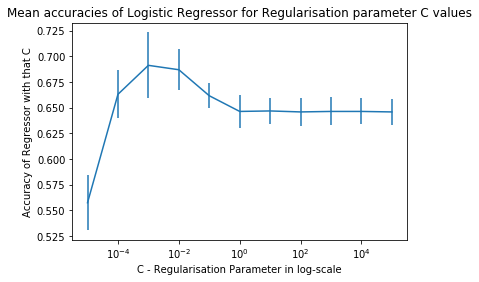

Optimal C value:  0.0010000
Optimal C value corresponding average k-fold classification accuracy:   0.691


In [326]:
# Plotting the distribution of errors
means_lr = np.mean(accuracies_lr, axis=0) #calculate the means of each C VALUE (hence use axis=0), 
#since we want the plot as a function of C (accross folds)

stds_lr=np.std(accuracies_lr,axis=0)

Crange_lr = np.logspace(start=-5, stop=5, num=11) #use the range of the C values as the x-axis
plt.errorbar(x=Crange_lr, y=means_lr,yerr=stds_lr) #use mean accuracies per fold as y axis and standard deviations as errors in errorbar.
plt.semilogx() #setting the correct scale to the x-axis to match the range (logspace)
plt.xlabel("C - Regularisation Parameter in log-scale")
plt.ylabel("Accuracy of Regressor with that C")
plt.title("Mean accuracies of Logistic Regressor for Regularisation parameter C values")
plt.show()


#used np function where (as asked for a suitable np function)
#to find the position of the max mean accuracy and use it to extract the C value from the range of C values using the index.
C_optimal_lr = Crange_lr[np.where(means_lr==means_lr.max())[0][0]] #note we use [0][0] to deal with the 2d output format of where.


print ("Optimal C value: ", "%0.7f" %C_optimal_lr) #print formatted to 7 d.p. the optimal C parameter
print ("Optimal C value corresponding average k-fold classification accuracy:  ", round(means_lr.max(),3))

In [328]:
#Similarly for the mean log losses
means_log_lr = np.mean(log_losses_lr, axis=0) 
stds_log_lr=np.std(log_losses_lr,axis=0)
C_optimal_log_lr = Crange_lr[np.where(means_log_lr==means_log_lr.min())[0][0]] #note we we want MINIMUM log loss
print ("Optimal C value: ", "%0.7f" %C_optimal_log_lr) 
print ("Optimal C value corresponding average k-fold log loss:  ", round(means_log_lr.min(),3))

Optimal C value:  0.0010000
Optimal C value corresponding average k-fold log loss:   0.58


### We use the optimal C value (0.001) to see if our Logistic Regressor's performance (accuracy & log loss) improved on the validation set

In [333]:
lr_optimal=LogisticRegression(C=C_optimal_log_lr,solver='lbfgs')#setting up with our optimal C parameter
lr_optimal.fit(X_train_scaled,y_train_clean) #fitting with our training data
accuracy_lr_optimal=lr_optimal.score(X_val_scaled,y_val)
probs_lr_optimal=lr_optimal.predict_proba(X_val_scaled)
log_loss_lr_optimal=log_loss(y_pred=probs_lr_optimal,y_true=y_val)
print('Accuracy of optimised Logistic Regressor with C=0.001 : ', round(accuracy_lr_optimal,2) )
print('Log loss of optimised Logistic Regressor with C=0.001: ',round(log_loss_lr_optimal,3))

Accuracy of optimised Logistic Regressor with C=0.001 :  0.69
Log loss of optimised Logistic Regressor with C=0.001:  0.584


### We can see that the optimised Logistic Regressor has improved significantly in log loss (~25% drop/improvement). However, the accuracy and log loss again do not win over the default initial RBF SVC.

## We will now try to calibrate the probability distributions of our 4 optimised classifiers using sklearn's `CalibratedClassifierCV` (see [References](#references))

In [410]:
#USED SIGMOID METHOD AFTER TRIAL AND ERROR SHOWING THAT FOR OUR DATASET IT PERFORMS BETTER
rbf_cali=CalibratedClassifierCV(base_estimator=svc_rbf_optimised,cv=kfold,method='sigmoid')
Poly_cali=CalibratedClassifierCV(base_estimator=svc_polynomial_optimised,cv=kfold,method='sigmoid')
rf_cali=CalibratedClassifierCV(base_estimator=rf_optimised,cv=kfold,method='sigmoid')
lr_cali=CalibratedClassifierCV(base_estimator=lr_optimal,cv=kfold,method='sigmoid')

In [413]:
rbf_cali.fit(X_train_scaled,y_train_clean)
probs_rbf_cali=rbf_cali.predict_proba(X_val_scaled)
log_loss_rbf_cali=log_loss(y_pred=probs_rbf_cali,y_true=y_val)
accuracy_rbf_cali=rbf_cali.score(X_val_scaled,y_val)
print('Accuracy of calibrated RBF SVC : ', round(accuracy_rbf_cali,2) )
print('Log loss of calibrated RBF SVC : ',round(log_loss_rbf_cali,3))


Accuracy of calibrated RBF SVC :  0.71
Log loss of calibrated RBF SVC :  0.559


### We unfortunately got only the same (not *lower*) log loss with the calibrated RBF SVC

In [391]:
Poly_cali.fit(X_train_scaled,y_train_clean)
probs_Poly_cali=Poly_cali.predict_proba(X_val_scaled)
log_loss_Poly_cali=log_loss(y_pred=probs_Poly_cali,y_true=y_val)
accuracy_Poly_cali=Poly_cali.score(X_val_scaled,y_val)
print('Accuracy of calibrated Poly SVC : ', round(accuracy_Poly_cali,2) )
print('Log loss of calibrated Poly SVC : ',round(log_loss_Poly_cali,3))

Accuracy of calibrated Poly SVC :  0.7
Log loss of calibrated Poly SVC :  0.568


### We unfortunately got only the same (not *lower*) log loss with the calibrated Polynomial SVC, too

In [395]:
rf_cali.fit(X_train_scaled,y_train_clean)
probs_rf_cali=rf_cali.predict_proba(X_val_scaled)
log_loss_rf_cali=log_loss(y_pred=probs_rf_cali,y_true=y_val)
accuracy_rf_cali=rf_cali.score(X_val_scaled,y_val)
print('Accuracy of calibrated RandomForest : ', round(accuracy_rf_cali,2) )
print('Log loss of calibrated RandomForest : ',round(log_loss_rf_cali,3))

Accuracy of calibrated RandomForest :  0.68
Log loss of calibrated RandomForest :  0.598


### We got a ***lower*** (~3% improvement) log loss with the calibrated RandomForest (than the optimised RanfomForest), however it doesn't compete with the SVCs

In [411]:
lr_cali.fit(X_train_scaled,y_train_clean)
probs_lr_cali=lr_cali.predict_proba(X_val_scaled)
log_loss_lr_cali=log_loss(y_pred=probs_lr_cali,y_true=y_val)
accuracy_lr_cali=lr_cali.score(X_val_scaled,y_val)
print('Accuracy of calibrated LogisticRegressor : ', round(accuracy_lr_cali,2) )
print('Log loss of calibrated LogisticRegressor : ',round(log_loss_lr_cali,3))

Accuracy of calibrated LogisticRegressor :  0.69
Log loss of calibrated LogisticRegressor :  0.584


### We unfortunately got only the same (not *lower*) log loss with the calibrated LogisticRegressor, too

## Final answer (probabilities for test set):

In [19]:
kfold=sklearn.model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
final=CalibratedClassifierCV(base_estimator=SVC(kernel='rbf'),cv=kfold,method='isotonic')
final.fit(X_train_scaled,y_train_clean)
pred_probabilities=final.predict_proba(X_test_scaled)

<a id='references'></a>
## References
- Classifier Comparison https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
-  Assignment1- Analysis (for removing outliers from the data)
-  Lab2- RandomForest Classifier and *feature importances* (did not make a difference so I did not reduce the features)
-  Lab3- Classification and Evaluation (for SVMs, and scaling the data) 
-  https://stackoverflow.com/questions/51841506/data-standardization-vs-normalization-vs-robust-scaler for comparing scalers
-  **Lab3 Solutions Q2.13** Calibration of Models for log loss: https://scikit-learn.org/0.19/modules/calibration.html
-  **continued** and CalibratedClassifierCV: https://scikit-learn.org/0.19/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV
-  Assignment3A (for optimising the parameters of LogisticRegressor and SVCs
-  Lab 5 for PCA (**not very familliar with PCA, checked if it makes a difference, it did not so I did not implement it in the end**)

#ANSWER_TEXT#

***Your answer goes here:***
### Introduction
For the Mini Challenge Assignment, I developed a step-by-step approach of *pre-processing the data*, *selecting the classifiers* and *optimising their performances* in order to obtain as high accuracies and as low log losses as possible.
The methods I used were inspired from the previous Labs (mainly labs 2 and 3), as well as from the previous coursework and some online sklearn documentation.
### Dataset pre-processing
#### Inspection
The first task was obviously to inspect the three datasets provided, mainly focusing on `Images_C_Train` as it is the training dataset which is fitted to each classifier and it is its *patterns* that affect the basis of the whole performance (accuracy abd log loss), *regardless* the classifier used.
#### Removing outliers
After inspection using summary statistics & visualisation, I discovered outliers in the training dataset (abnormally large `max` values compared to `mean` for each feature). I used the method I implemented in *Assignment1* to remove the outliers from the training data. 
The rest of the datasets seemed to not contain outliers and therefore I did not alter them (Actually, I tried removing them and the results are worse. Also the shape of the pred_probs anticipated is (1114,2) so we shouldn't remove any of its entries).
#### Scaling
On trialing on the **cleaned** training data with some classifiers, I wanted to experiment with different scaling modes, including the StandardScaler,RobustScaler and QuantileTransformer. I ended up with the best scores using the RobustScaler, so I only left that in the implementation, removing the other two scalers/transformers.
I scaled the *validation* and *test* sets with the same RobustScaler(fitted on the training data to keep its pattern).
### Selecting top classifiers 
I first tried implementing classifiers learnt during the course with their default settings on the *validation* set, including: GaussianNB,MLPClassifier,RandomForest,SVCs,LogisticRegression,KNN with different kernels etc.
I visualised their scores (*accuracy* **and** *log loss*) on the *validation set*, in order to pick only the top-performance classifiers for optimisation. 
I picked the SVCs(*best scores*, for which I had to select the best *kernels*),LogisticRegressor(fairly good scores and promising as its name suggests) and RandomForest(low log loss).
#### Choosing SVC kernels
I took a sample of 2 dimensions (as we did in Assignment3A) and visualised the decision boundaries for different kernels. It was clear from the plots that the data was **not** linearly separable, and hence the Linear SVC,although promising in terms of scores, wouldn't get higher performance than the other two kernels, `rbf` and `polynomial`.
### Optimising hyperparameters
I attempted optimising each classifier's hyperparameters. I used my manual grid search-kfold *cross validation* from Assignment3A, as well as sklearn's GridSearchCV (for RandomForest as it had many parameters and kfold was taking too long to run).
For RBF (`gamma` and `C`) and Polynomial (`degree` and `C`) SVCs, the optimisation did **not** yield *significantly* better results.
For LogisticRegressor and RandomForest, the improvement was ***big***, especially *log loss*. The problem was that these two classifiers, although performing **much better when optimised**, did not surpass the RBF SVC accuracy&log loss performance.
### Calibration
After reading the documentation on Probability Calibration (see [References](#references)), I implemented `CalibratedClassifierCV` for **all** the *optimised* classifiers, using isotonic and sigmoid calibration, (kept best each time). However, even with calibration, the performance remained the same. I ended up calibrating the early-found RBF SVC to finally predict the pred_probabilities for the *testing set* as a final answer.
### Reasons of no success
-  *Not well-distributed* and *complete* dataset & outliers in the *training data*.
-  Poor luck with optimisation (perhaps did not discover best ranges of values for hyperparameters)
-  This is the best we can get for this binary classification problem using these datasets(unlikely).

#### Word count: `598` including headings

<div align="left"><font color="green" size="4">Very nice work! You would have gotten full points on the presentation even with less detail. I have nothing to criticise, so will only name a few things I liked most:

The plots (beautiful!)
The outlier removal and subsequent scaling of the data
The systematic optimisation of all parameters for the different SVMs



80/80</font></div>

<div align="right"><font color="blue" size="4">80.0/80.0</font></div>

<div align="right"><font color="blue" size="4">80.0</font></div>

In [20]:
#ANSWER_PROB#
# Run this cell when you are ready to submit your test-set probabilities. This cell will generate some
# warning messages if something is not right: make sure to address them!
if pred_probabilities.shape != (1114, 2):
    print('Array is of incorrect shape. Rectify this before submitting.')
elif (pred_probabilities.sum(axis=1) != 1.0).all():
    print('Submitted values are not correct probabilities. Rectify this before submitting.')
else:
    for _prob in pred_probabilities:
        print('{:.8f}, {:.8f}'.format(_prob[0], _prob[1]))

0.80215136, 0.19784864
0.86240767, 0.13759233
0.42996669, 0.57003331
0.40062993, 0.59937007
0.78903874, 0.21096126
0.02929293, 0.97070707
0.23273262, 0.76726738
0.07718025, 0.92281975
0.81427258, 0.18572742
0.77992914, 0.22007086
0.52870705, 0.47129295
0.73614308, 0.26385692
0.52196283, 0.47803717
0.61562757, 0.38437243
0.00000000, 1.00000000
0.61629006, 0.38370994
0.02929293, 0.97070707
0.56059634, 0.43940366
0.93093924, 0.06906076
0.39745756, 0.60254244
0.78420357, 0.21579643
0.46348708, 0.53651292
0.77513103, 0.22486897
0.57858917, 0.42141083
0.73204052, 0.26795948
0.02929293, 0.97070707
0.14360450, 0.85639550
0.75698746, 0.24301254
0.31587548, 0.68412452
0.50222497, 0.49777503
0.82342865, 0.17657135
0.38823058, 0.61176942
0.89466574, 0.10533426
0.52720647, 0.47279353
0.77335291, 0.22664709
0.46348708, 0.53651292
0.11960450, 0.88039550
0.81427258, 0.18572742
0.80850057, 0.19149943
0.55227607, 0.44772393
0.78903874, 0.21096126
0.66246833, 0.33753167
0.55658759, 0.44341241
0.86240767,

<div align="right"><font color="blue" size="4">16.0/20.0</font></div>

<div align="right"><font color="blue" size="4">AutoRanking: 16/20</font></div>

<div align="left"><font color="green" size="4">Good work.  Your solution was better than my random forest baseline...but not by much! I fitted the Random Forest model out of the box with minimal tuning (I increased number of trees and performed a short search for a good value for max_features). I would always recommend this model for tabular data as your first step after a Dummy Baseline. This model got a logloss of 0.5965.</font></div>